# PCA on Faces

In this exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction.The dataset ex7faces.mat contains a dataset X of face images, each 32 by 32 in grayscale. Each row of X corresponds to one face image (a row vector of length 1024). The first step is to load and visualize the first 100 of these face images.

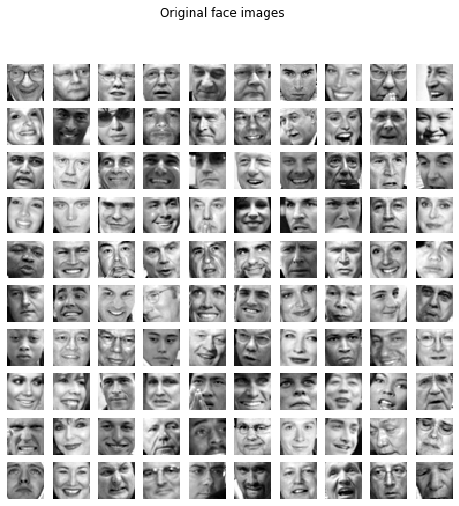

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
from PIL import Image


def plot_images(X_image, num_images, title):
    num_images_x = int(np.sqrt(num_images))
    fig3, ax_array = plt.subplots(num_images_x, num_images_x, figsize=(8, 8))
    for i, ax in enumerate(ax_array.flat):
        image = X_image[i, :]
        num_rows = num_cols = int(np.sqrt(len(image)))
        ax.imshow(image.reshape(num_rows, num_cols, order='F'), cmap='gray')
        fig3.suptitle(title)
        ax.axis('off')

os.getcwd()
data2 = sio.loadmat('./data/ex7faces.mat')
X_image = data2['X']
num_images = 100
plot_images(X_image, num_images, 'Original face images')

To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix X. We will also do feature scaling using sklearn's StandardScaler which performs mean normalization of the features in addition to feature scaling. We will the run sklearn's PCA algorithm and compute the principal components of the image dataset.

In [7]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_image_scaled = scaler.fit_transform(X_image)
pca = PCA(n_components=100)
pca.fit(X_image_scaled)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.project the face dataset onto only the first 100 principal components. Concretely, each face image is now described
by a vector z(i) which is an element of R100.

In [9]:
X_image_reduced = pca.transform(X_image_scaled)
print(X_image_reduced[0, :])

[15.11610674 -4.98929978 -5.77207788 -3.98279325  1.18743602 -3.12839973
 -1.2240294   5.73204761  0.80589233 -1.49355378 -3.63723103 -1.61262856
  0.88799292 -4.2417543  -1.1266829  -0.45983883  3.51585742 -4.53329094
 -0.8899109  -1.53678758  1.4048289  -2.83454065  2.63852584 -1.81562578
 -0.47986008 -0.25448491  3.46560476  1.53825654 -4.08135492  0.18149209
  2.53748025 -1.02264258  2.59742065  0.6749657  -2.02242351 -1.71760338
  0.7235642   2.19173945  2.81602218 -0.07991497  0.20799576  1.62976161
 -2.14408703 -0.12941994  2.21094604 -1.78679338  1.91705274 -2.65114248
  2.40721546 -1.67079907 -1.80006152 -0.43017371  0.3369829  -1.14181776
  0.65098513  1.93326632  1.41801825 -0.12560329  2.14967587  1.34399081
  0.64300241  0.80235187 -0.43845084 -0.78549926  0.84549129 -0.5717894
  1.31820724 -0.80846371  0.56396987  0.50079175  0.25110028  1.65713777
 -1.19621734 -0.39970138  0.45353294  1.1386147  -1.11617334  0.1744476
  1.81314339  0.99873497 -0.98944989 -2.77427224 -2.0

To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset. This can be done using the inverse_transform method of PCA class. Now display the images using recovered data. From the reconstruction, you can ob-serve that the general structure and appearance of the face are kept while
the fine details are lost.

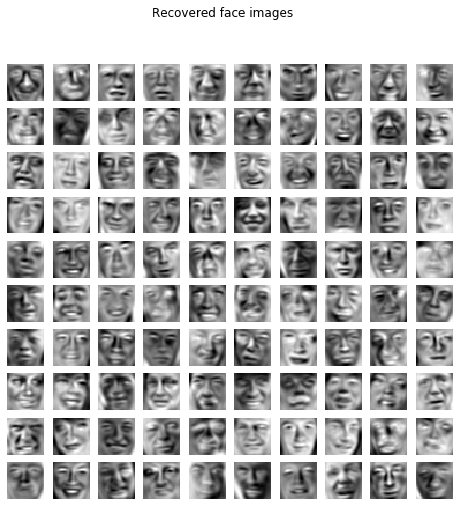

In [10]:
X_image_recovered = pca.inverse_transform(X_image_reduced)
plot_images(X_image_recovered, num_images, 'Recovered face images')

We can experiment further by increasing or decreasing the number of principal components to be used for the projected dataset and then plotting the images using recovered data from the projected dataset. We will see that as the number of components increases, finer details of the images are captured.

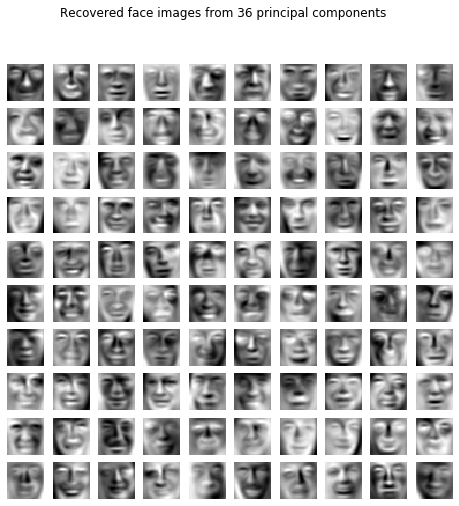

In [11]:
pca = PCA(n_components=36)
pca.fit(X_image_scaled)
X_image_reduced = pca.transform(X_image_scaled)
X_image_recovered = pca.inverse_transform(X_image_reduced)
plot_images(X_image_recovered, num_images, 'Recovered face images from 36 principal components')